<a href="https://colab.research.google.com/github/azavalac/SFH_dwarf_galaxies/blob/main/Proyecto_Modulo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Stellar Populations

In this tutorial, we demonstrate **ArtPop**’s built-in stellar population synthesis capability. Because of the modular design of the code, it is possible to build stellar populations independently from generating mock images. This is useful, for example, when you are only interested in calculating integrated photometric properties of the population.

**Note:** To generate MIST synthetic photometry using **ArtPop**, [MIST isochrone grids](https://artpop.readthedocs.io/en/latest/getting_started/mist.html) are required. The first time you use a MIST grid, **ArtPop** will download it and save it to your `MIST_PATH`. If this environment variable is not set, the grid(s) will be saved in `~/.artpop/mist`.

### Install ArtPop and its dependencies

In [2]:
!pip install artpop -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.7 MB/s eta 0:00:00


In [3]:
# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# Project import
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(112)

/root/.artpop/mist. To change this location, create a MIST_PATH environment variable.


## Simple Stellar Population (SSP)

In **ArtPop**, the basic stellar population unit is the simple stellar population (SSP), which is a population of stars of a single age and metallicity. To synthesize an SSP, **ArtPop** samples stellar masses from a user-specified initial mass function (``imf``) and generates stellar magnitudes by interpolating synthetic photometry from an isochrone model.

Here, we will use the MIST isochrone models using **ArtPop**'s built-in tools for fetching MIST synthetic photometry grids. To generate an SSP using MIST, we use the ``MISTSSP`` class:

In [4]:
ssp = artpop.MISTSSP(
    log_age = 9,          # log of age in years
    feh = -1,             # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 1e5,      # number of stars
    imf = 'kroupa',       # default imf
    random_state = rng,   # random state for reproducibility
)

INFO:ArtPop Logger:Fetching MIST synthetic photometry grid for LSST.


INFO: Fetching MIST synthetic photometry grid for LSST.


INFO:ArtPop Logger:Extracting grid from MIST_v1.2_vvcrit0.4_LSST.txz.


INFO: Extracting grid from MIST_v1.2_vvcrit0.4_LSST.txz.


This generates a population of 10$^5$ stars of age 1 Gyr and metallicity [Fe/H] = -1 (a tenth the solar value). With ``phot_system = 'LSST'``, stellar magnitudes in the LSST _ugrizy_ photometric system are interpolated and stored in the ``ssp`` object. It is also possible to pass a list of photometric systems, e.g. ``['LSST', 'SDSSugriz']``, in which case magnitudes in both systems are interpolated and stored.

For reference, the supported MIST photometric system names are stored in the variable ``phot_system_list``:

In [5]:
artpop.phot_system_list

['HST_WFC3',
 'HST_ACSWF',
 'SDSSugriz',
 'CFHTugriz',
 'DECam',
 'HSC',
 'JWST',
 'LSST',
 'UBVRIplus',
 'UKIDSS',
 'WFIRST',
 'GALEX']

The filter names for a given photometric system may be recovered using the ``get_filter_names`` function:

In [6]:
artpop.get_filter_names('LSST')

['LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'LSST_y']

Using the ``log_Teff`` and ``log_L`` attributes of ``ssp``, the HR-diagram for the population may be plotted like this:

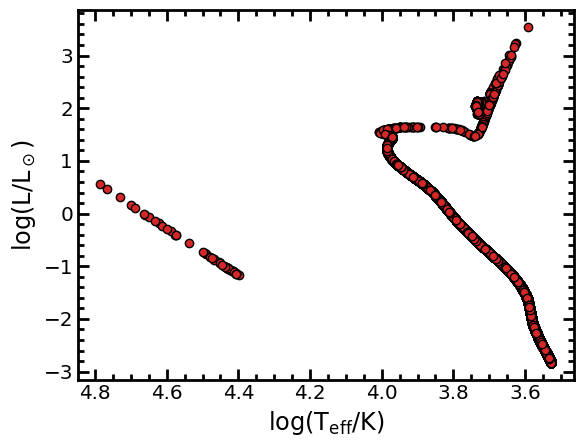

In [7]:
plt.plot(ssp.log_Teff, ssp.log_L, 'o', c='tab:red', mec='k')
plt.gca().invert_xaxis()
plt.minorticks_on()
plt.xlabel(r'$\log(\mathrm{T_{eff}/K})$')
plt.ylabel(r'$\log(\mathrm{L/L_\odot})$');

### Integrated Properties

There are several methods for calculating integrated photometric properties of the population:

In [8]:
print(f"M_i   = {ssp.total_mag('LSST_i'): .2f}")
print(f"SBF_i = {ssp.sbf_mag('LSST_i'): .2f}")
print(f"g - i = {ssp.integrated_color('LSST_g', 'LSST_i'): .2f}")

M_i   = -8.23
SBF_i = -1.53
g - i =  0.40


Note the returned magnitudes are in absolute units. This is because by default the SSP is assumed to be at 10 pc. To change the distance, you can either pass ``distance`` as an argument when you initialize ``SSP``, or you can use the ``set_distance`` method:  

In [9]:
# the distance can be given as a float or an astropy unit
distance = 10 * u.kpc
ssp.set_distance(distance)
print(f'D = {distance:.0f}\n--------------')
print(f"m_i   = {ssp.total_mag('LSST_i'): .2f}")
print(f"sbf_i = {ssp.sbf_mag('LSST_i'): .2f}")
print(f"g - i = {ssp.integrated_color('LSST_g', 'LSST_i'): .2f}")


# if a float is given, the unit is assumed to be Mpc
distance = 10
ssp.set_distance(distance)
print(f'\nD = {distance} Mpc\n--------------')
print(f"m_i   = {ssp.total_mag('LSST_i'): .2f}")
print(f"sbf_i = {ssp.sbf_mag('LSST_i'): .2f}")
print(f"g - i = {ssp.integrated_color('LSST_g', 'LSST_i'): .2f}")

D = 10 kpc
--------------
m_i   =  6.77
sbf_i =  13.47
g - i =  0.40

D = 10 Mpc
--------------
m_i   =  21.77
sbf_i =  28.47
g - i =  0.40


In [10]:
# the distance and distance modulus are attributes
print(f'D = {ssp.distance}, m - M = {ssp.dist_mod}')

D = 10.0 Mpc, m - M = 30.0


### Phase Masks

When using MIST SSPs, **ArtPop** uses the [Primary Equivalent Evolutionary Points (EEPs)](https://ui.adsabs.harvard.edu/abs/2016ApJS..222....8D/abstract) to identify the phase of stellar evolution of each star in the population. Use the ``select_phase`` method to generate a boolean mask that is set to ``True`` for stars in the given phase.

In [11]:
# available phases
ssp.phases

['PMS',
 'MS',
 'giants',
 'RGB',
 'CHeB',
 'AGB',
 'EAGB',
 'TPAGB',
 'postAGB',
 'WDCS']

Let's plot the HR-diagram with different colors for the main sequence (MS), red giant branch (RGB), and asymptotic giant branch (note that here the subgiant branch is included in the RGB):

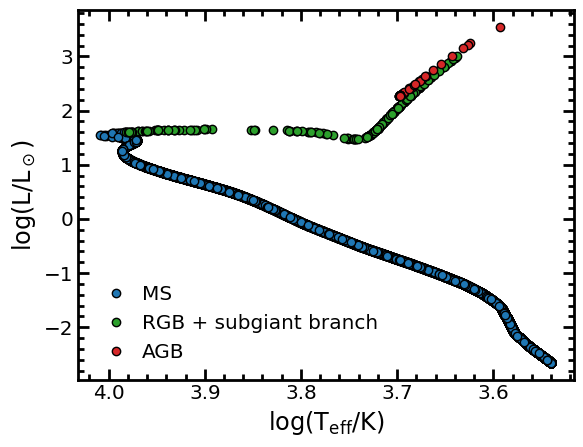

In [12]:
# generate boolean phase masks
MS = ssp.select_phase('MS')
RGB = ssp.select_phase('RGB')
AGB = ssp.select_phase('AGB')

plt.plot(ssp.log_Teff[MS], ssp.log_L[MS], 'o',
         label='MS', c='tab:blue', mec='k')
plt.plot(ssp.log_Teff[RGB], ssp.log_L[RGB], 'o',
         label='RGB + subgiant branch',
         c='tab:green', mec='k')
plt.plot(ssp.log_Teff[AGB], ssp.log_L[AGB], 'o',
         label='AGB', c='tab:red', mec='k')

plt.legend(loc='lower left')
plt.gca().invert_xaxis()
plt.minorticks_on()
plt.xlabel(r'$\log(\mathrm{T_{eff}/K})$')
plt.ylabel(r'$\log(\mathrm{L/L_\odot})$');

Check out the [SSP](https://artpop.readthedocs.io/en/latest/api/artpop.stars.SSP.html) API (or use tab complete) to see the full list of attributes and methods that are available.

### Sampling an IMF

As noted above, **ArtPop** is modular, which means all of its components can be used independently. For example, here we sample stellar masses from the [Kroupa initial mass function](https://ui.adsabs.harvard.edu/abs/2001MNRAS.322..231K/abstract):

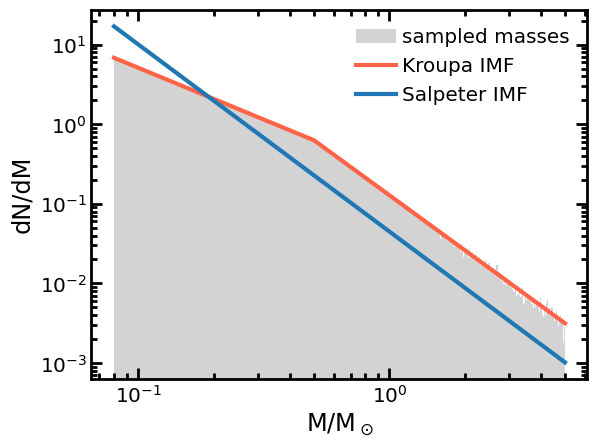

In [13]:
# sample the Kroupa IMF
m_min = 0.08 # minimum mass
m_max = 5.0  # maximum mass
sampled_masses = artpop.sample_imf(1e6, imf='kroupa',
                                   m_min=m_min, m_max=m_max,
                                   random_state=rng)

# plot histogram of sampled masses
plt.hist(sampled_masses, bins='auto', color='lightgray',
         density=True, label='sampled masses')

# plot the analytic Kroupa and Salpeter IMFs for comparison
mass_grid = np.logspace(np.log10(m_min), np.log10(m_max), 1000)
plt.loglog(mass_grid, artpop.kroupa(mass_grid, norm_type='number'),
           c='tomato', lw=3, label='Kroupa IMF')
plt.loglog(mass_grid, artpop.salpeter(mass_grid, norm_type='number'),
           c='tab:blue', lw=3, label='Salpeter IMF')

plt.legend()
plt.xlabel('M/M$_\odot$')
plt.ylabel('dN/dM');

## Composite Stellar Populations

In **ArtPop**, building composite stellar populations (CSPs) composed of two or more SSPs is as simple adding together ``SSP`` objects. In this example, we'll create three SSPs $-$ an old, intermediate-age, and young population, which we will combine into a composite population.

In [14]:
ssp_old = artpop.MISTSSP(
    log_age = 5.1,       # log of age in years
    feh = -1.5,           # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 5e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)

# ssp_intermediate = artpop.MISTSSP(
#     log_age = 9.5,        # log of age in years
#     feh = -1,             # metallicity [Fe/H]
#     phot_system = 'LSST', # photometric system(s)
#     num_stars = 1e5,      # number of stars
#     random_state = rng,   # random state for reproducibility
# )

# ssp_young = artpop.MISTSSP(
#     log_age = 7.5,        # log of age in years
#     feh = 0,              # metallicity [Fe/H]
#     phot_system = 'LSST', # photometric system(s)
#     num_stars = 1e4,      # number of stars
#     random_state = rng,   # random state for reproducibility
# )

In [15]:
ssp_old.num_stars

500000

We then intuitively combine the SSPs using the `+` operator:

In [16]:
import astropy.units as u

a = 10**(10.5) * u.yr
display(a)
display(a.to(u.Gyr))

<Quantity 3.16227766e+10 yr>

<Quantity 31.6227766 Gyr>

In [17]:
b = t * u.Gyr
display(b)
np.log10(14*10**9)

NameError: name 't' is not defined

In [ ]:
csp = ssp_old + ssp_intermediate + ssp_young
print(type(csp))

All of the ``SSP`` attributes and methods are available to `CSP` objects. Let's use the `star_mags` method to plot a color magnitude diagram for the CSP:

In [ ]:
i = csp.star_mags('LSST_i')
g = csp.star_mags('LSST_g')
plt.plot(g-i, i, 'o', c='blueviolet', mec='k')
plt.gca().invert_yaxis()

plt.xlabel(r'$g-i$')
plt.ylabel(r'M$_i$');

Each SSP is labeled (1, 2, 3, etc.) from left to right in the ``csp`` definition. You can isolate each population like this:

In [ ]:
old = csp.ssp_labels == 1
med = csp.ssp_labels == 2
young = csp.ssp_labels == 3

plt.plot(g[old] - i[old], i[old], 'o',
         c='tab:red', mec='k', label='old')
plt.plot(g[med] - i[med], i[med], 'o',
         c='tab:green', mec='k', label='intermediate')
plt.plot(g[young] - i[young], i[young], 'o',
         c='tab:blue', mec='k', label='young')

plt.legend(loc='center right')
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$g-i$')
plt.ylabel(r'M$_i$');

# The project

In [ ]:
!pip install artpop -q

In [18]:
np.logspace(np.log10(np.pi), np.log10(2*np.pi), 10) - np.pi

array([0.        , 0.25151509, 0.52316641, 0.81656606, 1.13345521,
       1.47571443, 1.84537483, 2.24463014, 2.67584973, 3.14159265])

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import artpop

def create_sfh(n_points, H_noise=30, nmax_stars=1e4):
    # Randomize amplitude and phase
    rho = np.random.rand(H_noise) * np.logspace(0.5, -2.5, H_noise)
    phi = np.random.rand(H_noise) * 2 * np.pi

    # Accumulate r(t) over t = [0, 2*pi]
    t = np.logspace(np.log10(np.pi), np.log10(2*np.pi), n_points) - np.pi
    r = np.ones_like(t)
    for h in range(1, H_noise + 1):
        r += rho[h - 1] * np.sin(h * t + phi[h - 1])

    # Update t to go from 0 to 14.
    t = (0.001 + t / np.pi) * 14

    # Update r to go from 0 to 1
    r_mask = r < 0.6 # Esto es para tener regiones sin formación. Este parámetro se puede variar
    r = r/r.max()
    r[r_mask] = 0

    # Scale the units of ratio to number of stars
    r *= int(nmax_stars)
    return r, t


def display_sfh(r, t):
    plt.figure(figsize=(8, 4))
    plt.title('SFH', fontsize=18)

    plt.bar(t, r, color='grey', width=10/len(t), edgecolor='black')
    plt.plot(t, r, 'ro')
    plt.plot(t, r, '--b')
    plt.xlabel('Time [Gyr]', fontsize=15)
    plt.ylabel('SFR', fontsize=15)

    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    plt.show()

# Uso:
# r, t = create_sfh(10, 100)
# display_sfh(r, t)


def build_csp(sfh_r, sfh_age):
    '''
    Función tipo de cómo crear csp
    '''
    sfh_logage = np.log10(sfh_age*1e9)
    list_pops = []

    for i, (r,t) in enumerate(zip(sfh_r, sfh_logage)):
        # print('Creating population %d of %d' % (i+1, len(sfh_r)))
        # print('r = %d, t = %f [%.1f Gyr]' % (r, t, (10**t)/1e9))
        if r == 0:
            continue
        pop_i = artpop.MISTSSP(
            log_age = t,          # log of age in years
            feh = -1,             # metallicity [Fe/H]
            phot_system = 'SDSSugriz', # photometric system(s),
            num_stars = r,
            )
        list_pops.append(pop_i)

    csp = list_pops[0]
    for i in range(1, len(list_pops)):
        ssp_i = list_pops[i]
        if ssp_i.num_stars > 0:
            csp = csp + ssp_i

    return csp


def create_csp(num_pops, H_noise=30, nmax_stars=1e4):
    r, t = create_sfh(num_pops, H_noise, nmax_stars)
    csp_ = build_csp(r,t)
    return csp_, r, t


def compute_magerr(m, b):
    '''De momento solo digamos que esto funciona bien y ya'''
    dm = 10**(10.3)*2.5/np.log(10) * np.sqrt(1/(10**(b-m/2.5)))
    return np.random.normal(m, dm)


def build_cmd(csp, plot=True):
    '''Construir el CMD'''
    i = csp.star_mags('SDSS_i')
    bi = 24.36
    i_err = compute_magerr(i, bi)

    g = csp.star_mags('SDSS_g')
    bg = 25.11
    g_err = compute_magerr(g, bg)

    if plot:
        plt.figure()
        plt.plot(g_err-i_err, i_err, 'o', c='blueviolet', mec='k')
        plt.xlim(-1, 2.5)
        plt.ylim(-4, 6)
        plt.gca().invert_yaxis()

        plt.xlabel(r'$g-i$')
        plt.ylabel(r'M$_i$');

    return g_err-i_err, i_err


def create_2dhist(cmd, bins=100, plot=True):
    H, yedges, xedges = np.histogram2d(cmd[1], cmd[0], bins=bins, density=True, range=[[-4, 6],[-1, 2.5]])
    if plot:
        plt.figure()
        plt.pcolormesh(xedges, yedges[::-1], H)
        plt.yticks(np.arange(-4, 7, 1), np.arange(6, -5, -1))
        plt.xticks(np.arange(-1, 2, 1), np.arange(-1, 2, 1))
        plt.colorbar()
        plt.xlabel(r'$g-i$')
        plt.ylabel(r'M$_i$')
        plt.show()

    return H, yedges, xedges

INFO:ArtPop Logger:Fetching MIST synthetic photometry grid for SDSSugriz.


INFO: Fetching MIST synthetic photometry grid for SDSSugriz.


INFO:ArtPop Logger:Extracting grid from MIST_v1.2_vvcrit0.4_SDSSugriz.txz.


INFO: Extracting grid from MIST_v1.2_vvcrit0.4_SDSSugriz.txz.


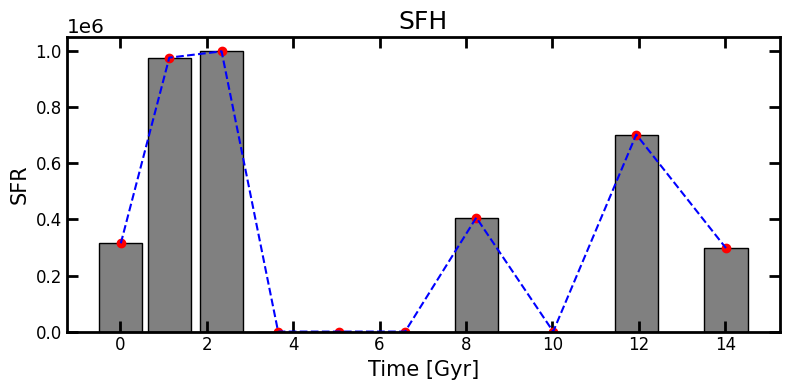

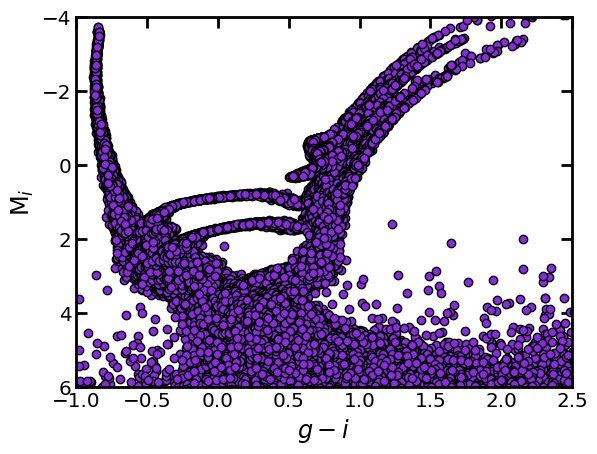

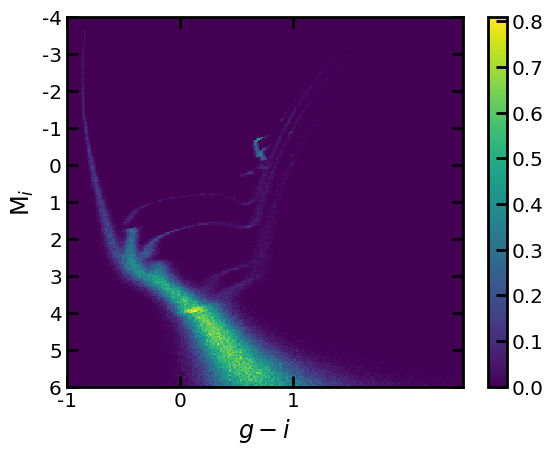

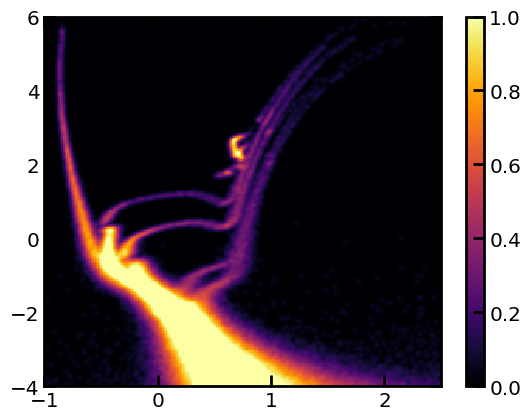

In [20]:
from scipy.ndimage import gaussian_filter

csp, r, t = create_csp(10, 50, nmax_stars=1e6)

display_sfh(r, t)
cmd = build_cmd(csp);
H, yed, xed = create_2dhist(cmd, bins=256)
blurred = gaussian_filter(H, sigma=1)

stamp = np.clip(np.sqrt(np.flipud(blurred)), 0, 0.5)
stamp_norm = stamp - stamp.min()
stamp_norm /= stamp.max()
plt.pcolormesh(xed, yed, stamp_norm, cmap='inferno')
plt.colorbar()

Creating 10 data points

Creating data point 1 of 10


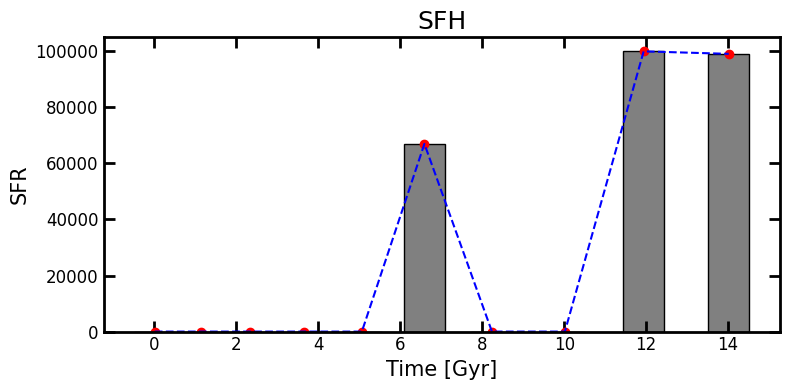

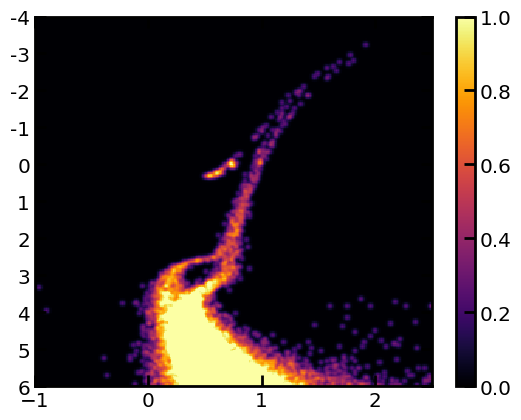


Creating data point 2 of 10


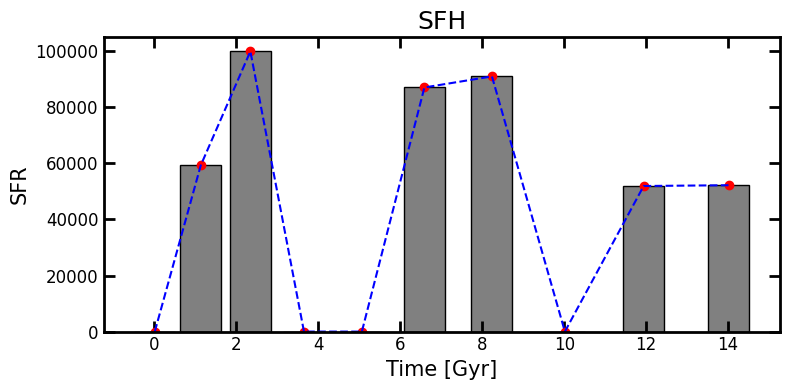

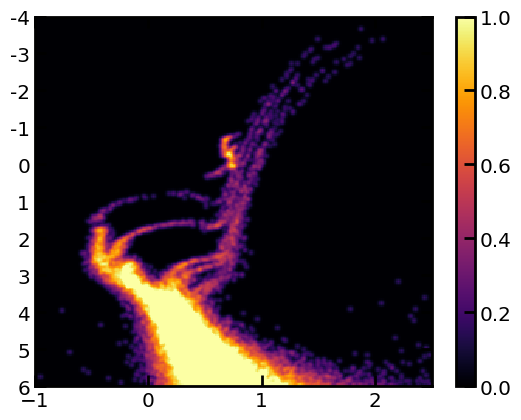


Creating data point 3 of 10


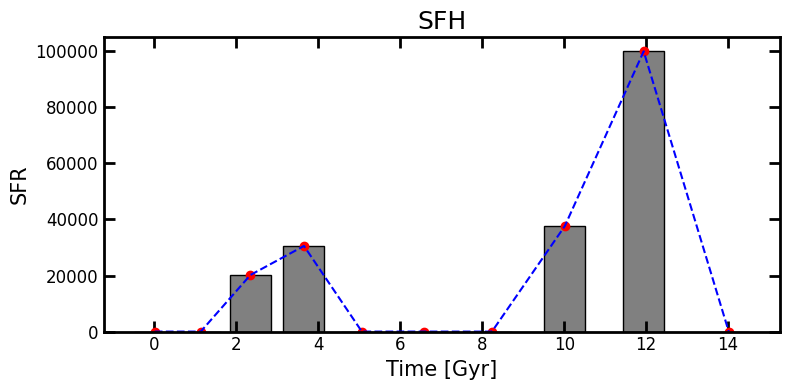

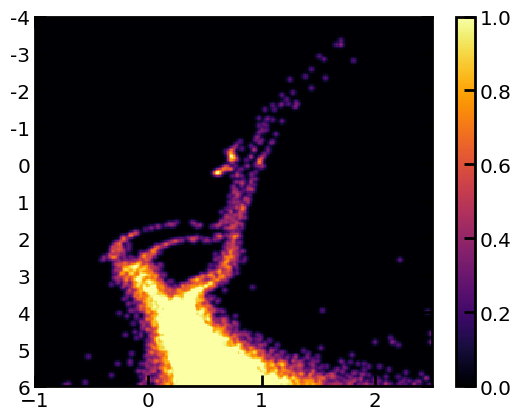


Creating data point 4 of 10


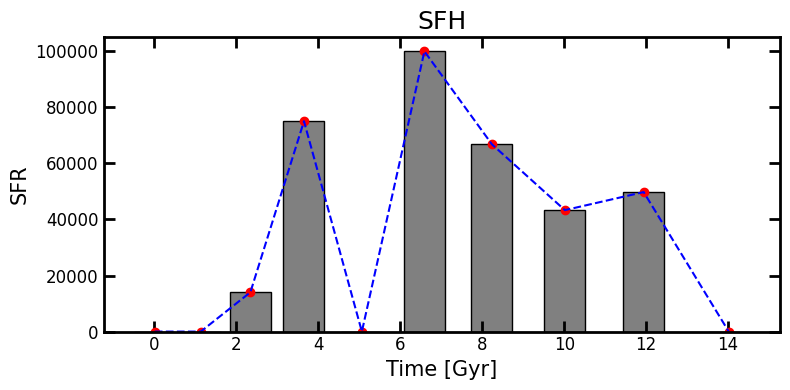

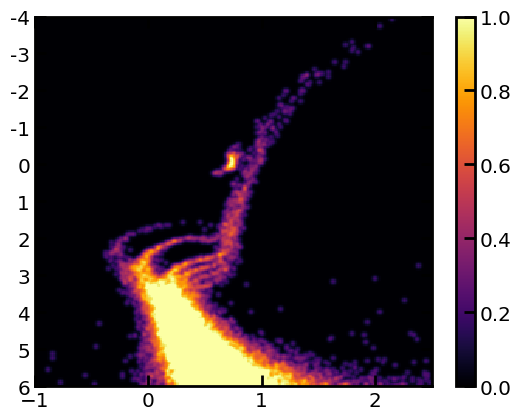


Creating data point 5 of 10


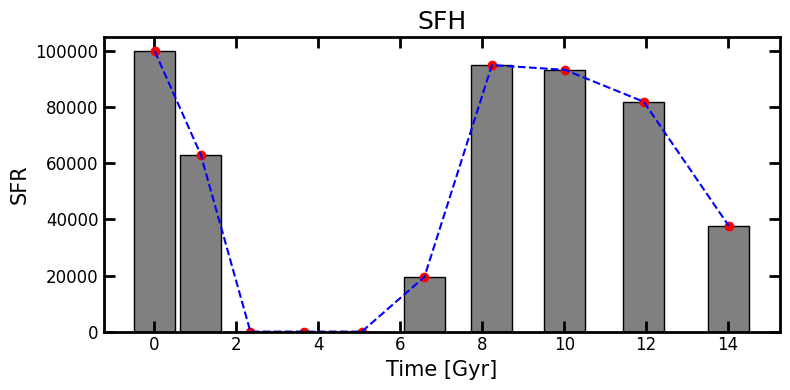

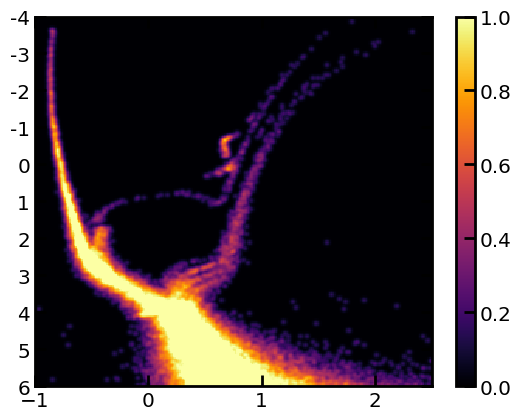


Creating data point 6 of 10


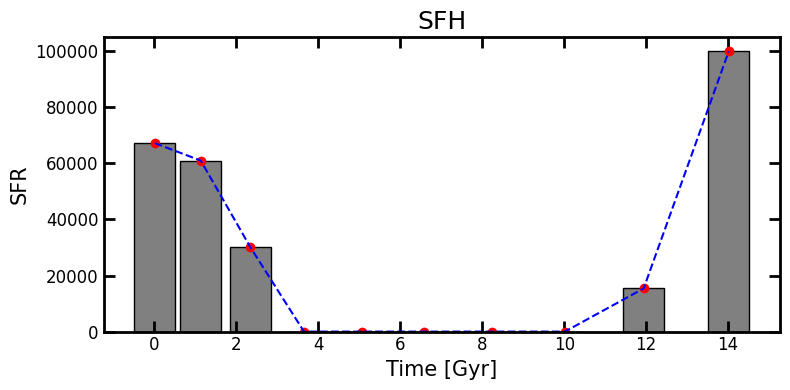

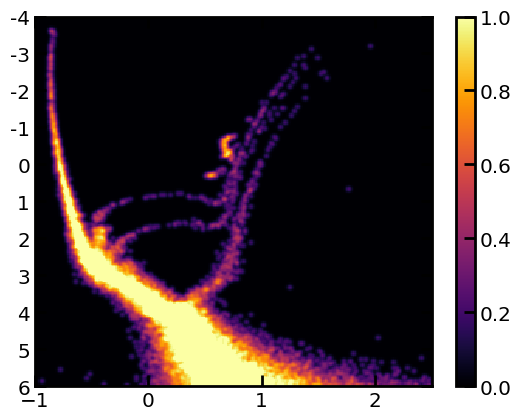


Creating data point 7 of 10


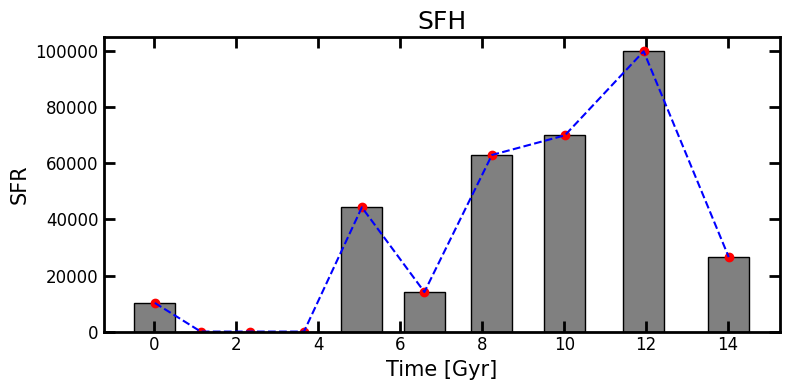

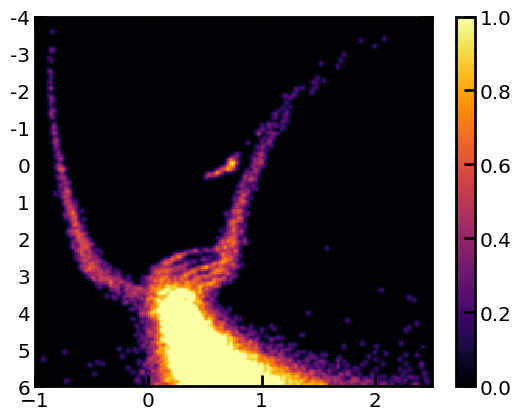


Creating data point 8 of 10


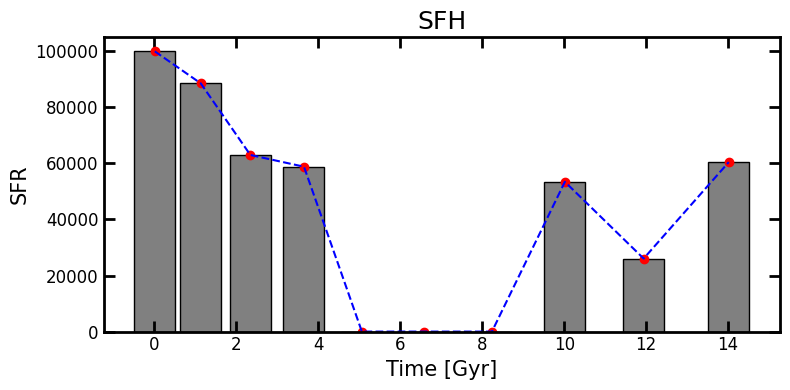

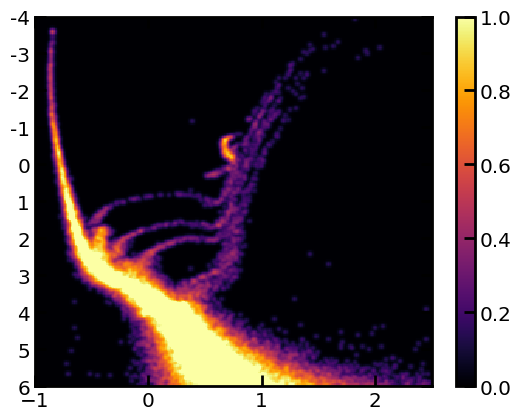


Creating data point 9 of 10


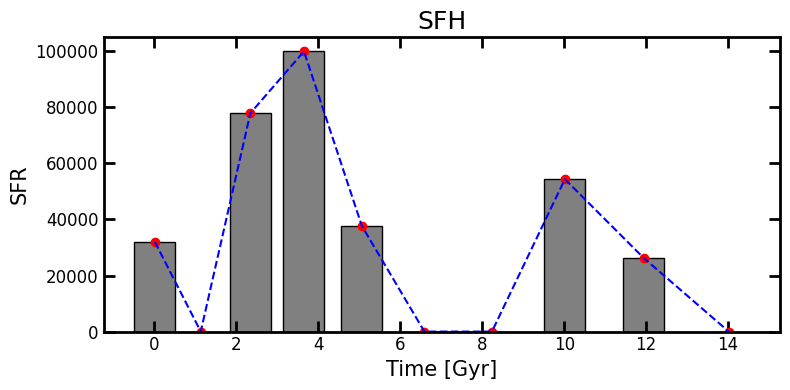

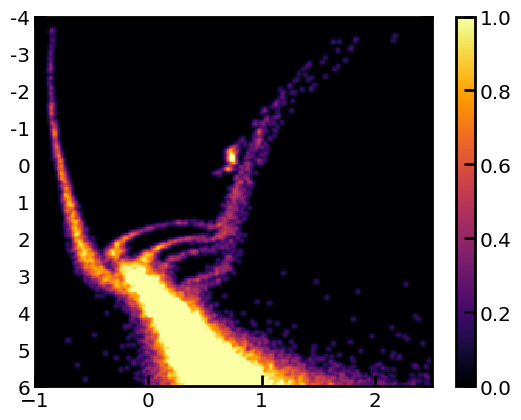


Creating data point 10 of 10


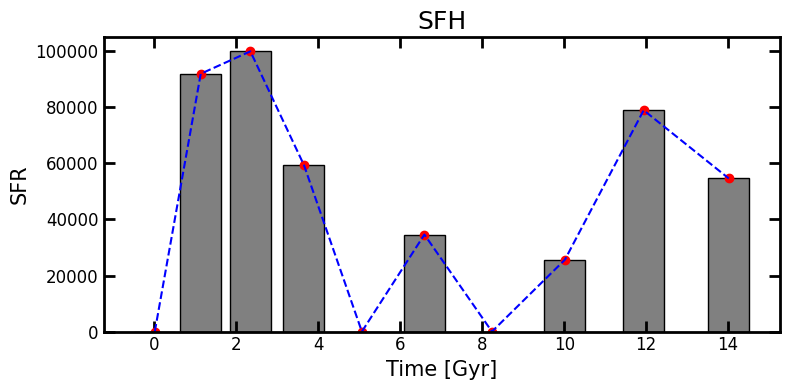

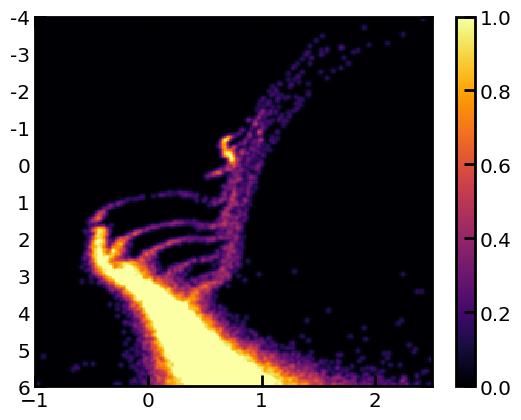

In [21]:
import os

def create_data(num_csp, num_pops=10, H_noise=50, nmax_stars=1e5, bins=256):

    stamp_data = np.zeros((num_csp, bins, bins))
    r_data = np.zeros((num_csp, num_pops))

    print('Creating %d data points' % num_csp)
    for i in range(num_csp):
        print('\nCreating data point %d of %d' % (i+1, num_csp))
        # Create data
        r, t = create_sfh(num_pops, H_noise, nmax_stars)
        while np.sum(r) == 0:
          r, t = create_sfh(num_pops, H_noise, nmax_stars)
        csp_ = build_csp(r,t)
        display_sfh(r, t)
        cmd = build_cmd(csp_, plot=False);
        H, yed, xed = create_2dhist(cmd, bins=bins, plot=False)
        blurred = gaussian_filter(H, sigma=1)

        stamp = np.clip(np.sqrt(np.flipud(blurred)), 0, 0.5)
        stamp_norm = stamp - stamp.min()
        stamp_norm /= stamp.max()

        plt.figure()
        plt.pcolormesh(xed, yed, stamp_norm, cmap='inferno')
        plt.yticks(np.arange(-4, 7, 1), np.arange(6, -5, -1))
        plt.colorbar()
        plt.show()

        stamp_data[i] = stamp_norm
        r_data[i] = r

    # Save it
    os.makedirs('data', exist_ok=True)
    np.save('data/stamps.npy', stamp_data)
    np.save('data/r.npy', r_data/r_data.max())

    return

create_data(10)

In [ ]:
# Load data

np.load('data/stamps.npy').shape
np.load('data/r.npy').shape

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#copia datos de una carpeta a otra de forma recursiva
!cp -r /content/data /content/drive/MyDrive/data_para_modulo

Datos que usaremos

In [ ]:
create_data(1500)

In [24]:
np.load('data/data_para_modulo/data/stamps.npy').shape
np.load('data/data_para_modulo/data/r.npy').shape

(1500, 10)

In [23]:
#copia datos del drive a la carpeta local
!cp -r /content/drive/MyDrive/data_para_modulo /content/data

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense

# Definición del modelo ajustado
def create_adjusted_sfh_model(input_shape, num_outputs):
    model = Sequential()
    # Capa de entrada
    model.add(Input(shape=input_shape))

    # Primera capa convolucional + MaxPooling
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Segunda capa convolucional + MaxPooling
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Tercera capa convolucional
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

    # Aplanar la salida para conectarla a las capas densas
    model.add(Flatten())

    # Capas densas
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))

    # Capa de salida con `num_outputs` neuronas
    model.add(Dense(num_outputs, activation='linear'))

    return model

# Parámetros del modelo
n = 256  # Tamaño del intervalo (ajustado según indicaciones)
num_outputs = 10  # Número de períodos de formación en las SFH
input_shape = (n, n, 1)  # Entrada con 1 canal (escala de grises)

# Crear el modelo
model = create_adjusted_sfh_model(input_shape, num_outputs)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Mostrar el resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 256)       │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │      33,554,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,943,754 (129.49 MB)

 Trainable params: 33,943,754 (129.49 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

# Cargar los datos
stamp_data = np.load('data/data_para_modulo/data/stamps.npy')  # Imágenes normalizadas
r_data = np.load('data/data_para_modulo/data/r.npy')          # Etiquetas normalizadas

# Asegurar la forma correcta de los datos para la CNN
stamp_data = stamp_data[..., np.newaxis]  # Añadir canal (grayscale)

# Dividir en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(stamp_data, r_data, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificar las formas
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,  # Ajusta según sea necesario
    batch_size=32,  # Ajusta según sea necesario
    verbose=1
)

# Evaluar en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test, verbose=1)
test_loss = model.predict(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")

X_train shape: (1050, 256, 256, 1), y_train shape: (1050, 10)
X_val shape: (225, 256, 256, 1), y_val shape: (225, 10)
X_test shape: (225, 256, 256, 1), y_test shape: (225, 10)
Epoch 1/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - loss: 0.2771 - val_loss: 0.0977
Epoch 2/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 279ms/step - loss: 0.0936 - val_loss: 0.0463
Epoch 3/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 274ms/step - loss: 0.0655 - val_loss: 0.0344
Epoch 4/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - loss: 0.0540 - val_loss: 0.0252
Epoch 5/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 283ms/step - loss: 0.0479 - val_loss: 0.0209
Epoch 6/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - loss: 0.0459 - val_loss: 0.0206
Epoch 7/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - loss: 0.0410 - val_loss: 0.0164
Epoch 8/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - loss: 0.0356 - val_loss: 0.0148
Epoch 9/150
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - loss: 0.0360 - val_loss: 0.0142
Epoch 10/150
33/33 ━━━━━━━━━━━━━━━━━━━

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [30]:
# Evaluar en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test, verbose=1)
#test_loss = model.predict(X_test, y, verbose=1)
print(f"Test Loss: {test_loss}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0133
Test Loss: 0.013279963284730911


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


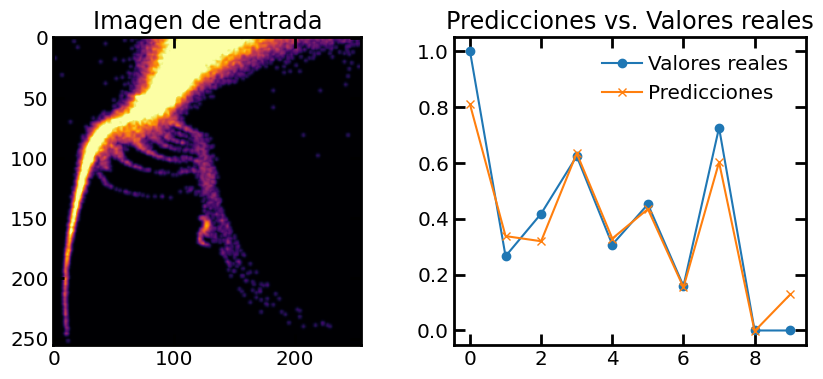

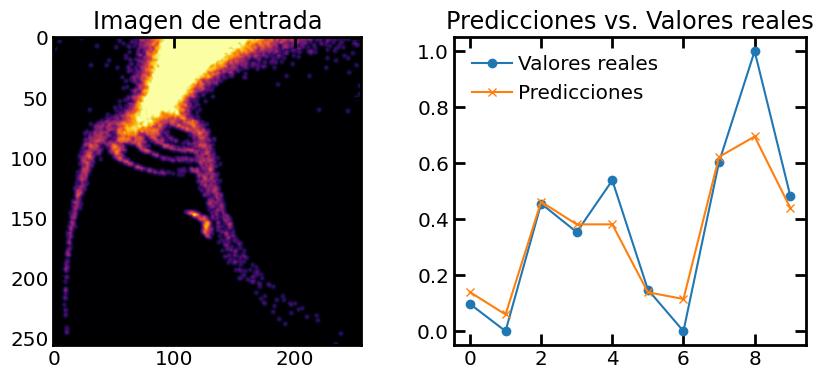

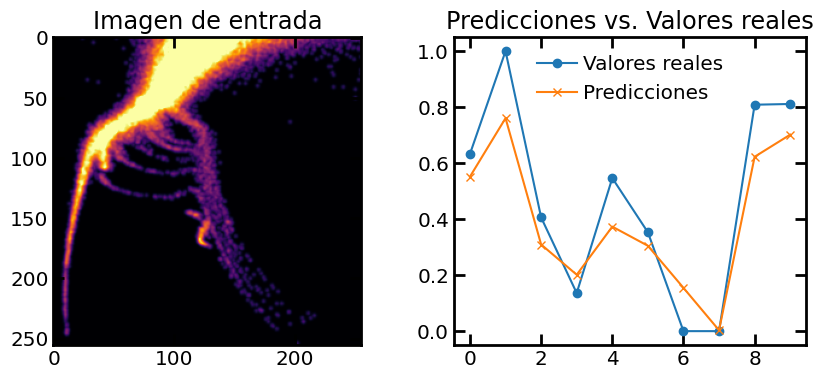

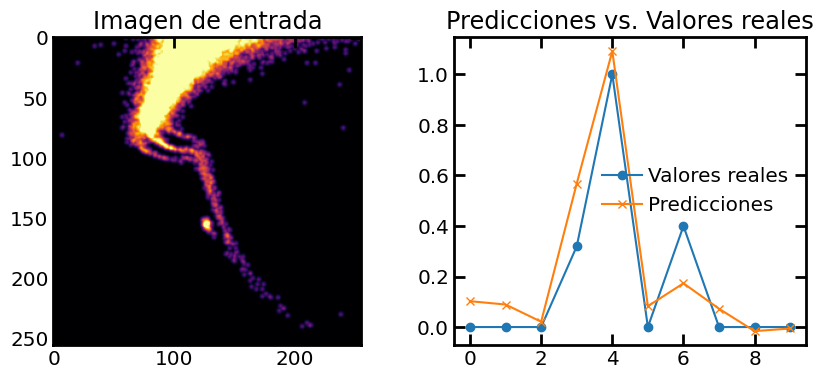

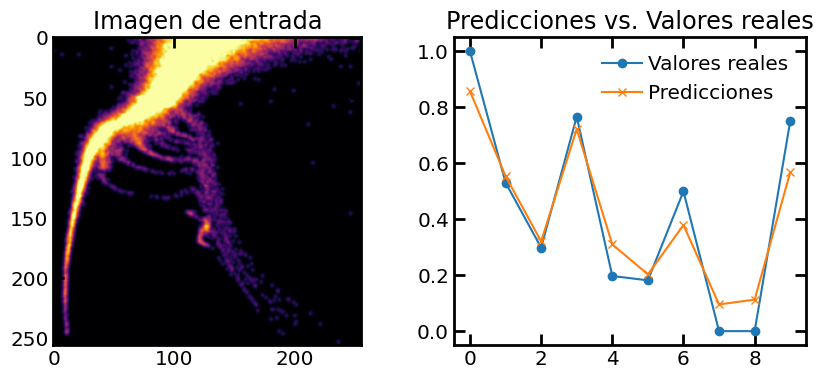

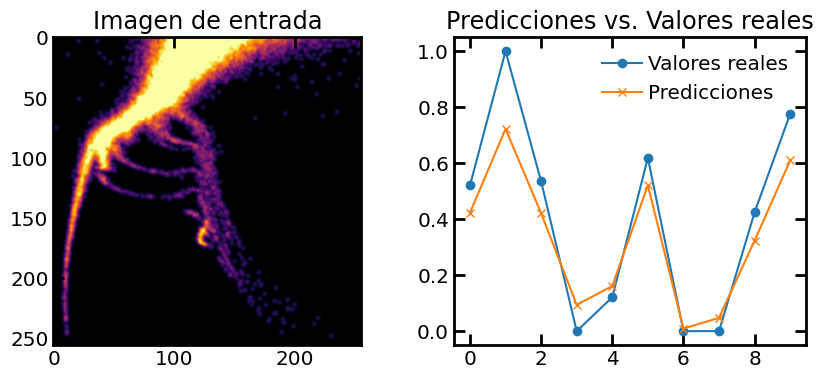

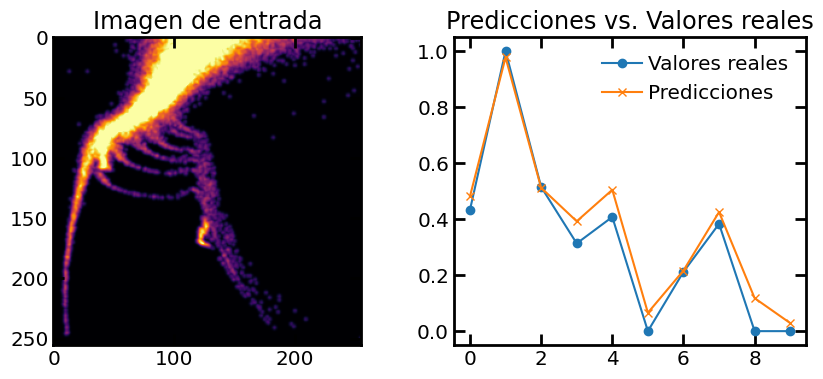

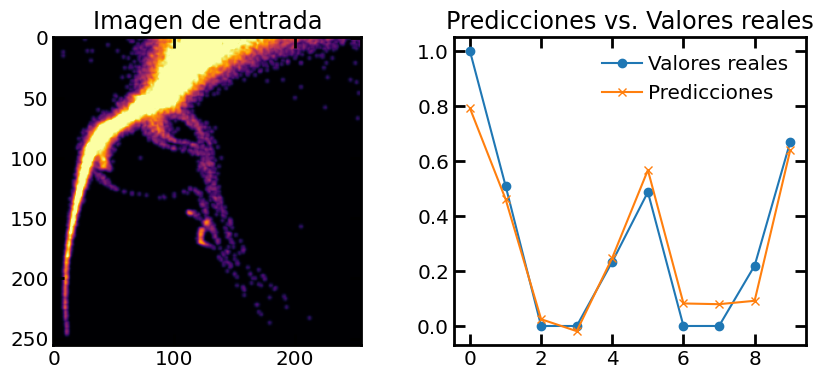

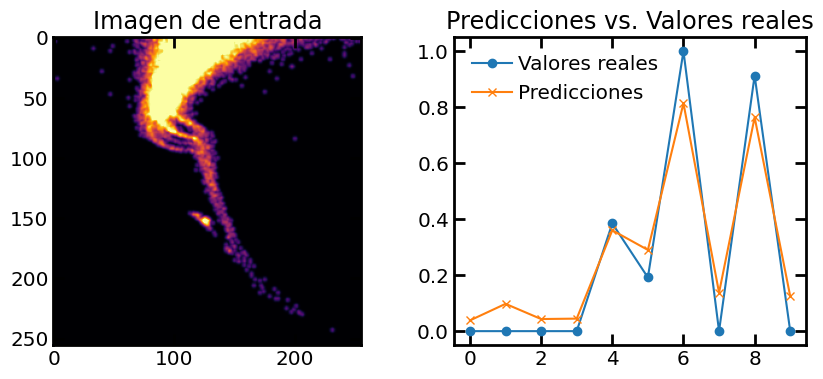

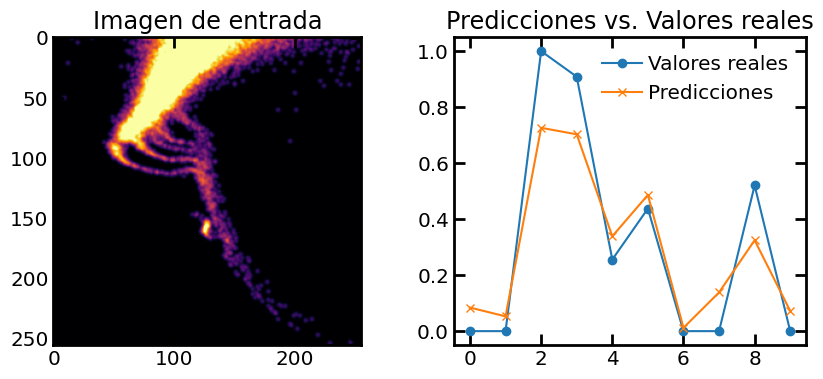

In [28]:
#PROBANDO EL MODELO

import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar las predicciones vs. valores reales para algunas muestras
for i in range(10):  # Mostrar 5 ejemplos
        plt.figure(figsize=(10, 4))

        # Mostrar la imagen de entrada
        plt.subplot(1, 2, 1)
        plt.imshow(X_test[i, :, :, 0], cmap='inferno')  # Ajustar cmap si es necesario
        plt.title("Imagen de entrada")

        # Mostrar las predicciones vs. valores reales
        plt.subplot(1, 2, 2)
        plt.plot(y_test[i], label="Valores reales", marker='o')
        plt.plot(y_pred[i], label="Predicciones", marker='x')
        plt.title("Predicciones vs. Valores reales")
        plt.legend()

        plt.show()